In [ ]:
# STEP 1: Import the required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


# %matplotlib inline

from google.colab import files
uploaded = files.upload()


df = pd.read_csv("newtrial - Sheet 1 - 01_District_wise_crim 2.csv")

display(df.head())

print(df.columns.tolist())

Saving newtrial - Sheet 1 - 01_District_wise_crim 2.csv to newtrial - Sheet 1 - 01_District_wise_crim 2 (1).csv


,STATE/UT,YEAR,MURDER,ATTEMPT TO MURDER,CULPABLE HOMICIDE NOT AMOUNTING TO MURDER,RAPE,CUSTODIAL RAPE,OTHER RAPE,KIDNAPPING & ABDUCTION,KIDNAPPING AND ABDUCTION OF WOMEN AND GIRLS,...,ARSON,HURT/GREVIOUS HURT,DOWRY DEATHS,ASSAULT ON WOMEN WITH INTENT TO OUTRAGE HER MODESTY,INSULT TO MODESTY OF WOMEN,CRUELTY BY HUSBAND OR HIS RELATIVES,IMPORTATION OF GIRLS FROM FOREIGN COUNTRIES,CAUSING DEATH BY NEGLIGENCE,OTHER IPC CRIMES,TOTAL IPC CRIMES
0,A & N ISLANDS,2001,13,0,0,3,0,3,2,2,...,4,118,0,19,1,9,0,0,323,658
1,A & N ISLANDS,2002,17,3,1,2,0,2,2,1,...,2,97,0,17,3,4,0,0,328,608
2,A & N ISLANDS,2003,21,4,1,2,0,2,2,2,...,8,110,0,9,2,7,0,0,318,644
3,A & N ISLANDS,2004,15,1,2,10,0,10,3,3,...,9,105,0,6,3,5,0,6,387,748
4,A & N ISLANDS,2005,14,3,3,4,0,4,2,1,...,6,79,0,11,1,5,0,3,362,682


['STATE/UT', 'YEAR', 'MURDER', 'ATTEMPT TO MURDER', 'CULPABLE HOMICIDE NOT AMOUNTING TO MURDER', 'RAPE', 'CUSTODIAL RAPE', 'OTHER RAPE', 'KIDNAPPING & ABDUCTION', 'KIDNAPPING AND ABDUCTION OF WOMEN AND GIRLS', 'KIDNAPPING AND ABDUCTION OF OTHERS', 'DACOITY', 'PREPARATION AND ASSEMBLY FOR DACOITY', 'ROBBERY', 'BURGLARY', 'THEFT', 'AUTO THEFT', 'OTHER THEFT', 'RIOTS', 'CRIMINAL BREACH OF TRUST', 'CHEATING', 'COUNTERFIETING', 'ARSON', 'HURT/GREVIOUS HURT', 'DOWRY DEATHS', 'ASSAULT ON WOMEN WITH INTENT TO OUTRAGE HER MODESTY', 'INSULT TO MODESTY OF WOMEN', 'CRUELTY BY HUSBAND OR HIS RELATIVES', 'IMPORTATION OF GIRLS FROM FOREIGN COUNTRIES', 'CAUSING DEATH BY NEGLIGENCE', 'OTHER IPC CRIMES', 'TOTAL IPC CRIMES']


In [ ]:
# STEP 2: Data Cleaning (Fixed)

# Clean column names
df.columns = df.columns.str.strip()

# Drop 'Total' rows if any
df = df[df['STATE/UT'].str.lower() != 'total']

# Select the main columns
important_cols = [
    'STATE/UT', 'YEAR', 'MURDER', 'RAPE',
    'KIDNAPPING & ABDUCTION', 'DACOITY', 'ROBBERY', 'BURGLARY', 'THEFT',
    'RIOTS', 'CRIMINAL BREACH OF TRUST', 'CHEATING',
    'DOWRY DEATHS', 'CRUELTY BY HUSBAND OR HIS RELATIVES',
    'ARSON', 'TOTAL IPC CRIMES'
]

df = df[important_cols]

# Display results
print(" Cleaned dataset info:\n")
df.info()
display(df.head())

 Cleaned dataset info:

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 420 entries, 0 to 419
Data columns (total 16 columns):
 #   Column                               Non-Null Count  Dtype 
---  ------                               --------------  ----- 
 0   STATE/UT                             420 non-null    object
 1   YEAR                                 420 non-null    int64 
 2   MURDER                               420 non-null    int64 
 3   RAPE                                 420 non-null    int64 
 4   KIDNAPPING & ABDUCTION               420 non-null    int64 
 5   DACOITY                              420 non-null    int64 
 6   ROBBERY                              420 non-null    int64 
 7   BURGLARY                             420 non-null    int64 
 8   THEFT                                420 non-null    int64 
 9   RIOTS                                420 non-null    int64 
 10  CRIMINAL BREACH OF TRUST             420 non-null    int64 
 11  CHEATING             

,STATE/UT,YEAR,MURDER,RAPE,KIDNAPPING & ABDUCTION,DACOITY,ROBBERY,BURGLARY,THEFT,RIOTS,CRIMINAL BREACH OF TRUST,CHEATING,DOWRY DEATHS,CRUELTY BY HUSBAND OR HIS RELATIVES,ARSON,TOTAL IPC CRIMES
0,A & N ISLANDS,2001,13,3,2,0,4,64,65,13,10,8,0,9,4,658
1,A & N ISLANDS,2002,17,2,2,1,7,49,49,11,4,11,0,4,2,608
2,A & N ISLANDS,2003,21,2,2,2,7,56,60,19,3,13,0,7,8,644
3,A & N ISLANDS,2004,15,10,3,0,3,69,103,9,0,12,0,5,9,748
4,A & N ISLANDS,2005,14,4,2,0,4,68,92,4,8,13,0,5,6,682


Summary Statistics:



,YEAR,MURDER,RAPE,KIDNAPPING & ABDUCTION,DACOITY,ROBBERY,BURGLARY,THEFT,RIOTS,CRIMINAL BREACH OF TRUST,CHEATING,DOWRY DEATHS,CRUELTY BY HUSBAND OR HIS RELATIVES,ARSON,TOTAL IPC CRIMES
count,420.000000,420.000000,420.00000,420.000000,420.000000,420.000000,420.000000,420.000000,420.000000,420.000000,420.000000,420.000000,420.000000,420.000000,420.000000
mean,2006.500000,958.435714,569.37381,849.659524,141.450000,591.111905,2660.330952,8334.595238,1845.064286,438.145238,1827.611905,217.147619,2083.811905,270.723810,57001.557143
std,3.456169,1213.687365,694.97765,1217.488114,222.740289,831.626950,3487.233431,10623.515022,2601.316466,665.567076,2883.369615,396.788651,3236.534832,357.828308,66193.547043
min,2001.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,4.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,31.000000
25%,2003.750000,46.000000,29.00000,37.500000,5.000000,20.750000,166.000000,462.250000,31.000000,23.000000,57.750000,1.000000,11.750000,18.000000,2408.500000
50%,2006.500000,463.500000,298.50000,295.500000,37.500000,178.000000,1349.000000,3886.500000,582.000000,169.500000,549.000000,45.000000,663.500000,110.500000,30116.500000
75%,2009.250000,1461.000000,936.00000,1195.500000,184.500000,779.250000,4072.500000,15719.500000,2542.750000,548.250000,2363.000000,273.500000,2764.000000,413.000000,109178.500000
max,2012.000000,7601.000000,3425.00000,8878.000000,1319.000000,6949.000000,16617.000000,53449.000000,11214.000000,4296.000000,19646.000000,2322.000000,19865.000000,2830.000000,220335.000000


/tmp/ipython-input-144528960.py:9: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.lineplot(data=df, x='YEAR', y='TOTAL IPC CRIMES', ci=None)


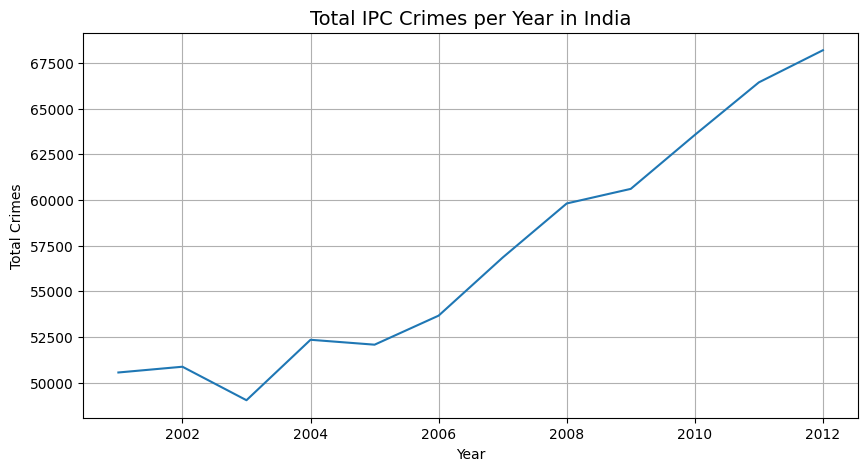

/tmp/ipython-input-144528960.py:19: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=state_crimes.values, y=state_crimes.index, palette="viridis")


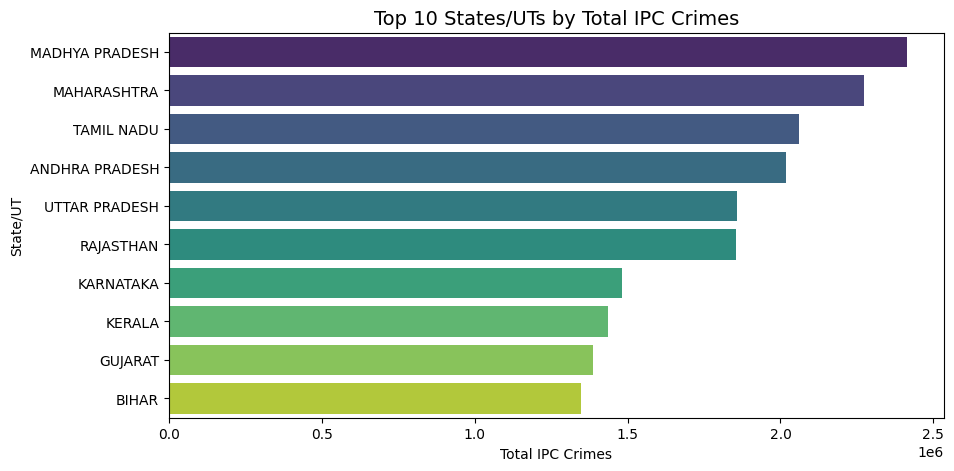

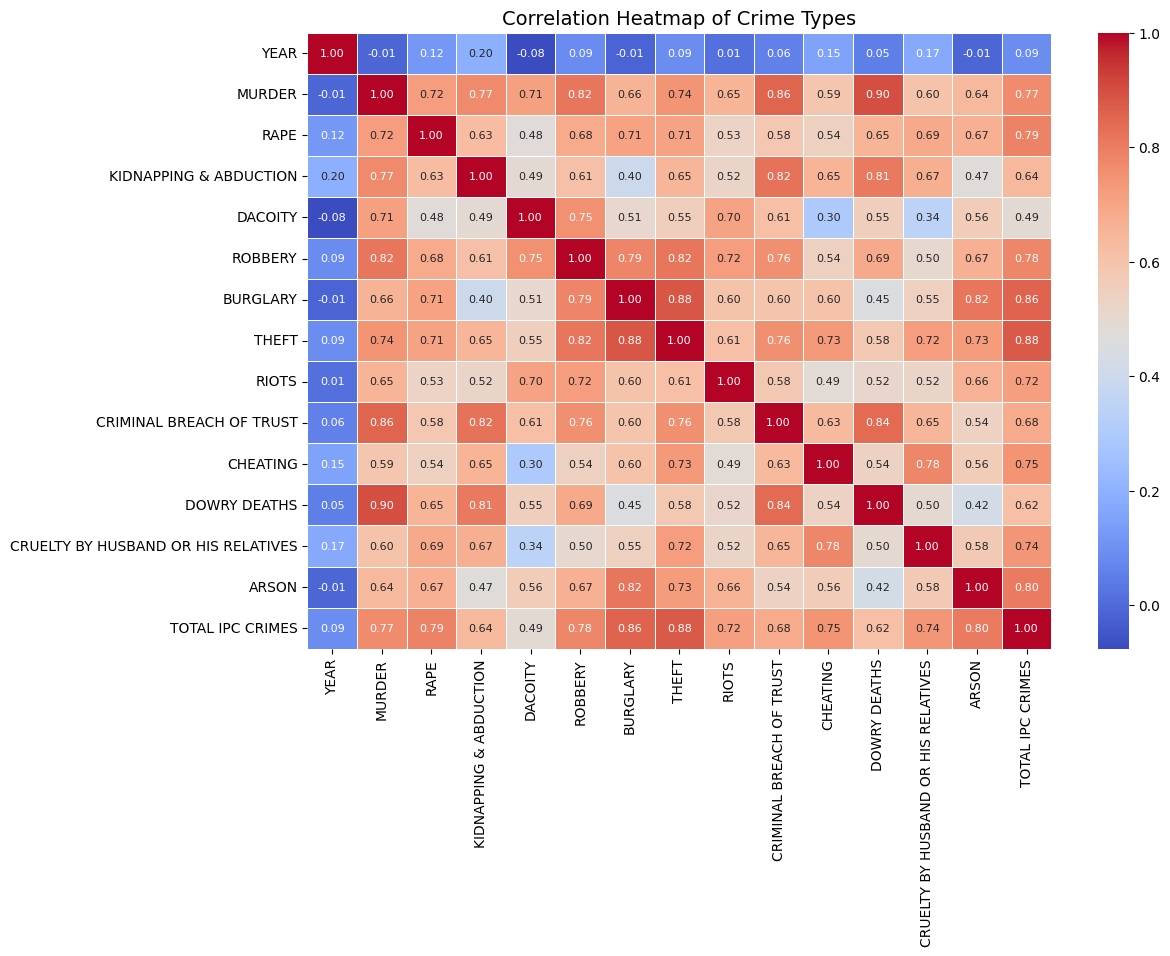

In [ ]:
# STEP 3: Exploratory Data Analysis (EDA)


print("Summary Statistics:\n")
display(df.describe())


plt.figure(figsize=(10,5))
sns.lineplot(data=df, x='YEAR', y='TOTAL IPC CRIMES', ci=None)
plt.title("Total IPC Crimes per Year in India", fontsize=14)
plt.xlabel("Year")
plt.ylabel("Total Crimes")
plt.grid(True)
plt.show()

state_crimes = df.groupby('STATE/UT')['TOTAL IPC CRIMES'].sum().sort_values(ascending=False).head(10)

plt.figure(figsize=(10,5))
sns.barplot(x=state_crimes.values, y=state_crimes.index, palette="viridis")
plt.title("Top 10 States/UTs by Total IPC Crimes", fontsize=14)
plt.xlabel("Total IPC Crimes")
plt.ylabel("State/UT")
plt.show()


plt.figure(figsize=(12,8))
sns.heatmap(
    df.select_dtypes(include=['int64']).corr(),
    cmap="coolwarm",
    annot=True,
    fmt=".2f",
    linewidths=0.5,
    annot_kws={"size": 8}
)
plt.title("Correlation Heatmap of Crime Types", fontsize=14)
plt.show()


In [ ]:
# ============================================
#  STEP 4: FEATURE SELECTION USING PCA
# ============================================

from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error

# Select all crime-based numeric columns EXCEPT target
X = df[['MURDER', 'RAPE', 'KIDNAPPING & ABDUCTION',
        'ROBBERY', 'BURGLARY', 'RIOTS', 'CHEATING',
        'DOWRY DEATHS', 'ARSON']]

y = df['TOTAL IPC CRIMES']

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

# Scaling is required before PCA
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled  = scaler.transform(X_test)

# Apply PCA – keep 95% variance
pca = PCA(n_components=0.95)
X_train_pca = pca.fit_transform(X_train_scaled)
X_test_pca  = pca.transform(X_test_scaled)

print("Original features:", X_train.shape[1])
print("PCA reduced features:", X_train_pca.shape[1])

Original features: 9
PCA reduced features: 6


In [ ]:
#  STEP 4.5: Define All Regression Models (UPDATED WITH ALL SVM KERNELS)

from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVR
from sklearn.neighbors import KNeighborsRegressor
from xgboost import XGBRegressor

models = {
    "Linear Regression": LinearRegression(),

    "Decision Tree": DecisionTreeRegressor(random_state=42),

    "Random Forest": RandomForestRegressor(
        n_estimators=200,
        random_state=42
    ),

    # Adding all SVM variants
    "SVM (Linear Kernel)": SVR(kernel="linear"),
    "SVM (Polynomial Kernel)": SVR(kernel="poly", degree=3),
    "SVM (RBF Kernel)": SVR(kernel="rbf"),
    "SVM (Sigmoid Kernel)": SVR(kernel="sigmoid"),

    "KNN Regressor": KNeighborsRegressor(n_neighbors=5),

    "XGBoost Regressor": XGBRegressor(
        n_estimators=200,
        learning_rate=0.1,
        max_depth=5,
        random_state=42
    )
}



In [ ]:
# STEP 5: TRAIN ALL REGRESSION MODELS

#  STEP 5: Train & Evaluate All Models (Forced Output)

results = []

print(" Training Models...\n")

for name, model in models.items():
    try:
        model.fit(X_train_pca, y_train)
        pred = model.predict(X_test_pca)

        r2  = r2_score(y_test, pred)
        rmse = np.sqrt(mean_squared_error(y_test, pred))
        mae  = mean_absolute_error(y_test, pred)

        # Force print for each model
        print(f"===============================")
        print(f" {name} Results")
        print(f"R² Score: {r2}")
        print(f"RMSE: {rmse}")
        print(f"MAE: {mae}")
        print("===============================\n")

        results.append([name, r2, rmse, mae])

    except Exception as e:
        print(f" Error in {name}: {e}")

# Always show comparison table
results_df = pd.DataFrame(results, columns=["Model", "R2 Score", "RMSE", "MAE"])
print("\n FINAL COMPARISON TABLE:\n")
display(results_df)


 Training Models...

 Linear Regression Results
R² Score: 0.816584635430524
RMSE: 29025.53155413342
MAE: 16895.318717993

 Decision Tree Results
R² Score: 0.9729633458614462
RMSE: 11143.940840312325
MAE: 6163.261904761905

 Random Forest Results
R² Score: 0.9640595243808833
RMSE: 12848.553440345146
MAE: 7469.34363095238

 SVM (Linear Kernel) Results
R² Score: -0.28351982001137155
RMSE: 76782.74158545716
MAE: 54642.93892839415

 SVM (Polynomial Kernel) Results
R² Score: -0.3197764971667436
RMSE: 77859.66310527531
MAE: 55560.0582393424

 SVM (RBF Kernel) Results
R² Score: -0.32853968602939987
RMSE: 78117.72576924809
MAE: 55699.49285528809

 SVM (Sigmoid Kernel) Results
R² Score: -0.3264643488476
RMSE: 78056.68732795047
MAE: 55657.917129684836

 KNN Regressor Results
R² Score: 0.9696007636297851
RMSE: 11816.630682885638
MAE: 6309.235714285714

 XGBoost Regressor Results
R² Score: 0.9768245220184326
RMSE: 10317.548546045227
MAE: 5502.0224609375


 FINAL COMPARISON TABLE:



,Model,R2 Score,RMSE,MAE
0,Linear Regression,0.816585,29025.531554,16895.318718
1,Decision Tree,0.972963,11143.940840,6163.261905
2,Random Forest,0.964060,12848.553440,7469.343631
3,SVM (Linear Kernel),-0.283520,76782.741585,54642.938928
4,SVM (Polynomial Kernel),-0.319776,77859.663105,55560.058239
5,SVM (RBF Kernel),-0.328540,78117.725769,55699.492855
6,SVM (Sigmoid Kernel),-0.326464,78056.687328,55657.917130
7,KNN Regressor,0.969601,11816.630683,6309.235714
8,XGBoost Regressor,0.976825,10317.548546,5502.022461


In [ ]:
#Step 6:Selecting the Best Regression Model

print("Selecting the Best Model Based on R2 Score...\n")

best_model_name = results_df.sort_values("R2 Score", ascending=False).iloc[0]["Model"]
best_model = models[best_model_name]

print(f" Best Model: {best_model_name}")

# Show its test set performance only
pred_test = best_model.predict(X_test_pca)

r2 = r2_score(y_test, pred_test)
rmse = np.sqrt(mean_squared_error(y_test, pred_test))
mae = mean_absolute_error(y_test, pred_test)

print("\n Final Performance of Best Model:\n")
print("R² Score:", r2)
print("RMSE:", rmse)
print("MAE:", mae)




Selecting the Best Model Based on R2 Score...

 Best Model: XGBoost Regressor

 Final Performance of Best Model:

R² Score: 0.9768245220184326
RMSE: 10317.548546045227
MAE: 5502.0224609375


In [ ]:
#Step 7:Future Crime Prediction Using the Best Model

print("\n Making Future Prediction...\n")

future_pred = best_model.predict(example_data_pca)
print(f"Predicted TOTAL IPC CRIMES: {int(future_pred[0])}")



 Making Future Prediction...

Predicted TOTAL IPC CRIMES: 756


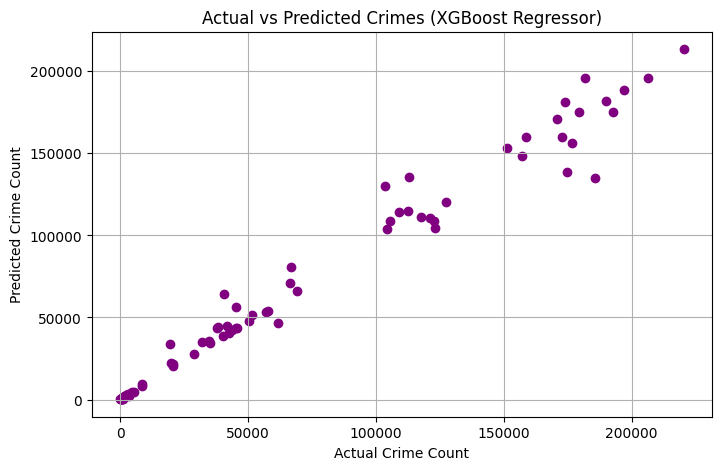

In [ ]:
#  STEP 8: Plot Graph for Best Model

plt.figure(figsize=(8, 5))
plt.scatter(y_test, pred_test, color='purple')
plt.xlabel("Actual Crime Count")
plt.ylabel("Predicted Crime Count")
plt.title(f"Actual vs Predicted Crimes ({best_model_name})")
plt.grid(True)
plt.show()



In [ ]:
#Step 9:Future Crime Prediction with Full PCA + Scaling Pipeline
example_data = np.array([[10, 20, 15, 8, 12, 30, 50, 7, 3]])   # example values
example_data_scaled = scaler.transform(example_data)
example_data_pca = pca.transform(example_data_scaled)

future_pred = best_model.predict(example_data_pca)
print(" Predicted TOTAL IPC CRIMES:", int(future_pred[0]))

 Predicted TOTAL IPC CRIMES: 756


/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
